In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os, random, re, subprocess, time

from matplotlib.pyplot import figure

from platform import python_version

print(python_version())

from scipy import stats

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

starting_dir = os.getcwd()
print (starting_dir)

3.7.8
/Users/kimd999/Dropbox/script/python/srpAnalytics/code/latest/2_bmd/3_after_bmd


In [3]:
# mac       - phase I, II, LPR - after_merging - 240 timepoints in min - results
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II_III/phase_I_II/output/LPR/240_timepoints_186_chemicals/BMD_from_all_endpoints/bmd_vals_2021_06_21.csv'
# 383 unique chemicals, 923 unique plates

df_lpr_BMD = pd.read_csv(complete_file_path, header = 0)
df_lpr_BMD.head()
#df_lpr_BMD.shape

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag
0,1030,MOV1,NaN,NaN,NaN,NaN,18.681734,0.0,50.0,0.373635,1,NaN,NaN,NaN
1,1030,AUC1,NaN,NaN,NaN,NaN,16.869375,0.0,50.0,0.337387,1,NaN,NaN,NaN
2,1031,MOV1,quantal_linear,10.344586,6.075361,68.055101,24.805868,0.0,50.0,0.496117,2,0.0,0.0,1.0
3,1031,AUC1,logistic,20.008143,14.567697,52.924446,13.110494,0.0,50.0,0.262210,4,0.0,0.0,1.0
4,1105,MOV1,log_logistic,0.139150,NaN,98.806696,48.158040,0.0,100.0,0.481580,4,2.0,-1.0,0.0


In [32]:
df_lpr_BMD_grouped = df_lpr_BMD.groupby(['End_Point'])
df_lpr_BMD_grouped.head()
#print(type(df_lpr_BMD_grouped))
#print(len(df_lpr_BMD_grouped))

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag
0,1030,MOV1,NaN,NaN,NaN,NaN,18.681734,0.0,50.0,0.373635,1,NaN,NaN,NaN
1,1030,AUC1,NaN,NaN,NaN,NaN,16.869375,0.0,50.0,0.337387,1,NaN,NaN,NaN
2,1031,MOV1,quantal_linear,10.344586,6.075361,68.055101,24.805868,0.0,50.0,0.496117,2,0.0,0.0,1.0
3,1031,AUC1,logistic,20.008143,14.567697,52.924446,13.110494,0.0,50.0,0.262210,4,0.0,0.0,1.0
4,1105,MOV1,log_logistic,0.139150,NaN,98.806696,48.158040,0.0,100.0,0.481580,4,2.0,-1.0,0.0
5,1105,AUC1,weibull,0.005401,NaN,1514.405571,37.342534,0.0,100.0,0.373425,4,0.0,-1.0,1.0
6,1114,MOV1,quantal_linear,0.197398,0.126797,1.298644,3.032197,0.0,4.5,0.673822,3,0.0,-1.0,0.0
7,1114,AUC1,quantal_linear,0.306498,0.227829,2.016390,2.529412,0.0,4.5,0.562092,3,0.0,-1.0,0.0
8,1161,MOV1,weibull,0.000046,NaN,4.230023,47.633742,0.0,67.0,0.710951,4,0.0,-1.0,0.0
9,1161,AUC1,gamma,0.229200,NaN,37.422733,35.785591,0.0,67.0,0.534113,3,0.0,-1.0,0.0


end_point:AUC1
end_point:AUC2
end_point:AUC3
end_point:AUC4
end_point:MOV1
end_point:MOV2
end_point:MOV3
end_point:MOV4


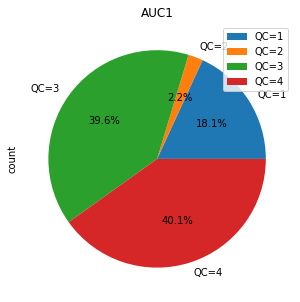

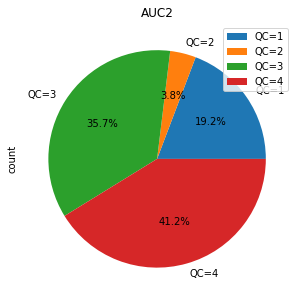

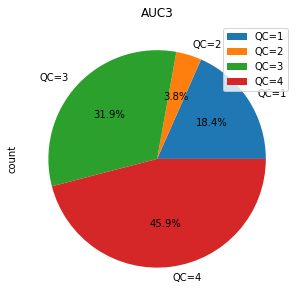

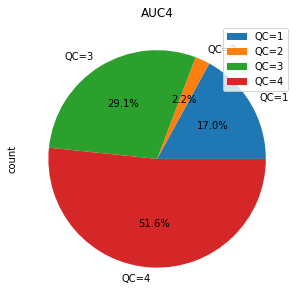

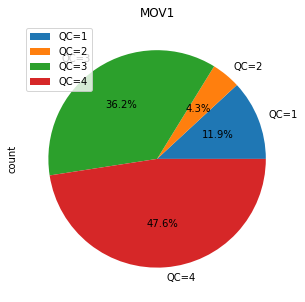

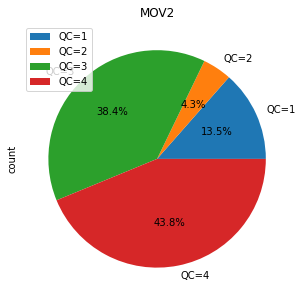

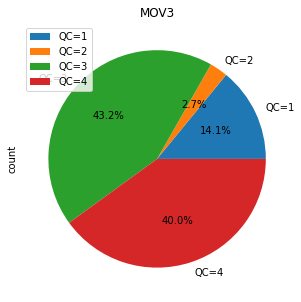

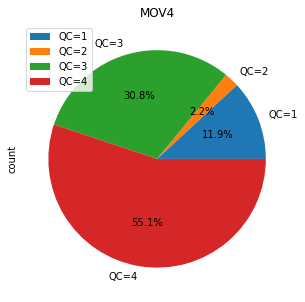

In [37]:
for end_point, df_group in df_lpr_BMD_grouped:
    print(f"end_point:{end_point}")
    #print(f"df_group:{df_group}")
    #print(df_group['DataQC_Flag'])
    
    count_1 = len(df_group[(df_group['DataQC_Flag'] == 1)])
    count_2 = len(df_group[(df_group['DataQC_Flag'] == 2)])
    count_3 = len(df_group[(df_group['DataQC_Flag'] == 3)])
    count_4 = len(df_group[(df_group['DataQC_Flag'] == 4)])
           
    df_per_count = pd.DataFrame({'count': [count_1, count_2, count_3, count_4]},
                  index=['QC=1', 'QC=2', 'QC=3', 'QC=4'])
    
    labels = ['QC=1', 'QC=2', 'QC=3', 'QC=4']


    #my_explode=(0,0.1)
    plot = df_per_count.plot.pie(title=end_point, y='count', figsize=(5, 5),autopct='%1.1f%%')
    plt.legend(labels, loc="best")